# Preparación de datos

## Inspección y Limpieza

In [3]:
import pandas as pd #Manipulacion de dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
visitas = pd.read_csv('datasets/visits_log_us.csv')
ordenes = pd.read_csv('datasets/orders_log_us.csv') 
costos = pd.read_csv('datasets/costs_us.csv')

### Visitas

In [5]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Se identifica que es neceario cambiar el dtype de End Ts y de Start Ts  a datetime ,ademas es necesario quitar los espacios y las mayúsculas de los titulos

In [6]:
columnas = visitas.columns

n_columnas=[]

for columna in columnas:
    minus = columna.lower()
    strip = minus.replace(" ","_")
    n_columnas.append(strip)


visitas.columns = n_columnas
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
visitas['start_ts'] = pd.to_datetime(visitas['start_ts'])
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'])

visitas.info()
visitas.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visitas.duplicated().sum()

0

Ya esta completa la limpieza del dataframe no tiene nulos ni faltantes ademas los titulos estan en minuscula y sin espacios , y las fechas estan en el formato especificado.

### Ordenes

In [9]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
ordenes.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


se encuentra el mismo problema de la tabla anterior se procede a cambiar la fecha al formato solicitado y a arreglar los titulos por buenas practicas

In [11]:
columna_o = ordenes.columns
new_o_columnas=[]

for columna in columna_o:
    minus = columna.lower()
    strip = minus.strip()
    replace = strip.replace(" ","_")
    new_o_columnas.append(replace)
    
ordenes.columns =  new_o_columnas
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'])
ordenes.info()
ordenes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
ordenes.duplicated().sum()

0

se completa el proceso debidamente

### Costos

In [14]:
costos.info()
costos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
costos['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

En este caso lo unico necesario es cambiar el type de la columna dt de object a fecha , se encuentra que hay solo 7 fuentes activas. Se recomienda actualizar la numeracion de los proveedores.

In [16]:
costos['dt']= pd.to_datetime(costos['dt'])
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
costos.duplicated().sum()

0

## Informes y metricas

### Visitas

In [18]:
visitas.info()
visitas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### ¿Cuántas personas lo usan cada día, semana y mes?


In [19]:
visitas['day'] = visitas['start_ts'].dt.day
visitas['week'] = visitas['start_ts'].dt.isocalendar().week
visitas['month'] = visitas['start_ts'].dt.month
visitas.head()

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12


In [20]:
per_monthu = visitas.groupby(["month"])['uid'].nunique()
per_weeku = visitas.groupby(["week"])['uid'].nunique()
per_dayu = visitas.groupby(["day"])['uid'].nunique()

In [21]:
print(f"Por mes entran un promedio de : {per_monthu.mean().round(0)} personas")
print("--------------------------------------------------------------------")
print(f"Por semana entran un promedio de : {per_weeku.mean().round(0)} personas")
print("--------------------------------------------------------------------")
print(f"Por día entran un promedio de : {per_dayu.mean().round(0)} personas")


Por mes entran un promedio de : 23228.0 personas
--------------------------------------------------------------------
Por semana entran un promedio de : 5825.0 personas
--------------------------------------------------------------------
Por día entran un promedio de : 10242.0 personas


Se deja comentado que la docuemntación suministrada esta herrada , dado que dicen que la informacion es del periodo entre enero de 2017 hasta diciembre de 2018 , y es mentira la informacion suministrada va desde 1 de junio del 2017 hasta 1 de junio del 2018.

#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [22]:
per_month = visitas.groupby(["month"])['uid'].count()
per_week = visitas.groupby(["week"])['uid'].count()
per_day = visitas.groupby(["day"])['uid'].count()

In [23]:
print(f"Por mes entran un promedio de : {per_month.mean().round(0)} personas")
print("--------------------------------------------------------------------")
print(f"Por semana entran un promedio de : {per_week.mean().round(0)} personas")
print("--------------------------------------------------------------------")
print(f"Por día entran un promedio de : {per_day.mean().round(0)} personas")

Por mes entran un promedio de : 29950.0 personas
--------------------------------------------------------------------
Por semana entran un promedio de : 6912.0 personas
--------------------------------------------------------------------
Por día entran un promedio de : 11594.0 personas


el trafico del personal es bastante bueno.

#### ¿Cuál es la duración de cada sesión?

In [24]:
visitas['seconds'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds

print(f"En promedio una sesion de un usuario dura un total de : {visitas['seconds'].mean().round(0)} segundos")


En promedio una sesion de un usuario dura un total de : 644.0 segundos


#### ¿Con qué frecuencia los usuarios regresan?


In [25]:
session_per_user = visitas.groupby(['month','week']).agg({'uid':['count','nunique']})
session_per_user.columns=['n_sesiones','cant_usuarios']

session_per_user['session_per_user'] = (session_per_user['n_sesiones'] /  session_per_user['cant_usuarios'])
session_per_user

n_sesiones  cant_usuarios  session_per_user
month week                                             
1     1           8057           6918          1.164643
      2           7871           6703          1.174250
      3           8317           6972          1.192915
      4           8488           7060          1.202266
      5           4206           3639          1.155812
...                ...            ...               ...
12    48          3835           3318          1.155817
      49         10298           8407          1.224932
      50         10120           8214          1.232043
      51          8500           7172          1.185165
      52          9230           7774          1.187291

[62 rows x 3 columns]

In [26]:
print(f"En promedio un los usuarios ingresan a la pagina {session_per_user['session_per_user'].mean().round(2)} vez a la semana")

En promedio un los usuarios ingresan a la pagina 1.17 vez a la semana


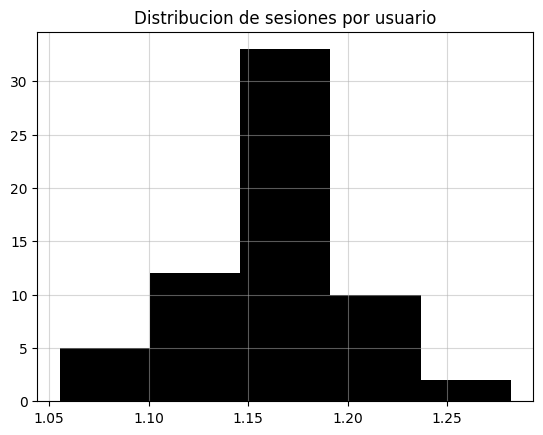

<Figure size 640x480 with 0 Axes>

In [27]:
plt.hist(session_per_user['session_per_user'], bins=5 ,color="black")
plt.title('Distribucion de sesiones por usuario')
plt.grid(True,alpha=0.5)
plt.show()
plt.savefig("images/graph_1.png")

### Ventas

#### Cuanto tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)


In [28]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [29]:
ventas = ordenes.merge(visitas, on='uid')
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761807 entries, 0 to 761806
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   buy_ts     761807 non-null  datetime64[ns]
 1   revenue    761807 non-null  float64       
 2   uid        761807 non-null  uint64        
 3   device     761807 non-null  object        
 4   end_ts     761807 non-null  datetime64[ns]
 5   source_id  761807 non-null  int64         
 6   start_ts   761807 non-null  datetime64[ns]
 7   day        761807 non-null  int32         
 8   week       761807 non-null  UInt32        
 9   month      761807 non-null  int32         
 10  seconds    761807 non-null  int32         
dtypes: UInt32(1), datetime64[ns](3), float64(1), int32(3), int64(1), object(1), uint64(1)
memory usage: 53.0+ MB


In [30]:
transcurso_primera_orden = ventas.groupby('uid').agg({'buy_ts':'min','start_ts':'min'}).reset_index()
transcurso_primera_orden['transcurso'] = (transcurso_primera_orden['buy_ts'] - transcurso_primera_orden['start_ts'] )
transcurso_primera_orden['transcurso_dias']=(transcurso_primera_orden['transcurso']).dt.days
transcurso_primera_orden['transcurso_meses']=(transcurso_primera_orden['transcurso_dias'])//30
transcurso_primera_orden.sample(10)

,uid,buy_ts,start_ts,transcurso,transcurso_dias,transcurso_meses
20802,10508844239912399002,2017-10-14 14:25:00,2017-10-14 13:28:00,0 days 00:57:00,0,0
27588,13945315713862809359,2017-12-07 18:07:00,2017-12-07 18:06:00,0 days 00:01:00,0,0
14106,7085789348401090663,2017-09-09 13:55:00,2017-09-09 13:49:00,0 days 00:06:00,0,0
4342,2191906401494532932,2018-01-16 12:14:00,2018-01-16 12:07:00,0 days 00:07:00,0,0
35791,18059153806823784586,2018-03-01 00:12:00,2018-02-28 23:50:00,0 days 00:22:00,0,0
27229,13748697097791877185,2017-09-29 13:55:00,2017-09-29 11:49:00,0 days 02:06:00,0,0
34619,17479473428509069344,2018-02-15 11:38:00,2018-02-15 11:35:00,0 days 00:03:00,0,0
23872,12065756663099308983,2018-03-25 09:18:00,2018-03-25 09:06:00,0 days 00:12:00,0,0
10802,5443964867115157365,2018-01-27 21:15:00,2018-01-27 10:28:00,0 days 10:47:00,0,0
16063,8055932189378456793,2018-05-31 11:44:00,2018-05-31 11:39:00,0 days 00:05:00,0,0


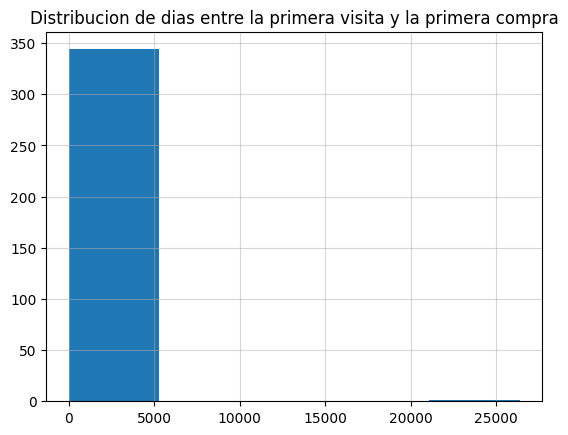

<Figure size 640x480 with 0 Axes>

In [31]:
transc_dias = transcurso_primera_orden.groupby('transcurso_dias').agg({'transcurso_dias':'count'})

plt.hist(transc_dias['transcurso_dias'] , bins=5)
plt.grid(True,alpha=0.5)
plt.title('Distribucion de dias entre la primera visita y la primera compra')
plt.show()
plt.savefig("images/graph_2.png")

In [32]:
transc_dias['transcurso_dias'].sum()
#durante el primer dia 26363 personas compran

36523

In [33]:
print(f"rate compradores el primer dia  : %{(26363/(transc_dias['transcurso_dias'].sum())*100).round(2)}")

rate compradores el primer dia  : %72.18


Podemos ver como los clientes tienden a comprar los primeros días luego de haber ingresado a la pagina.

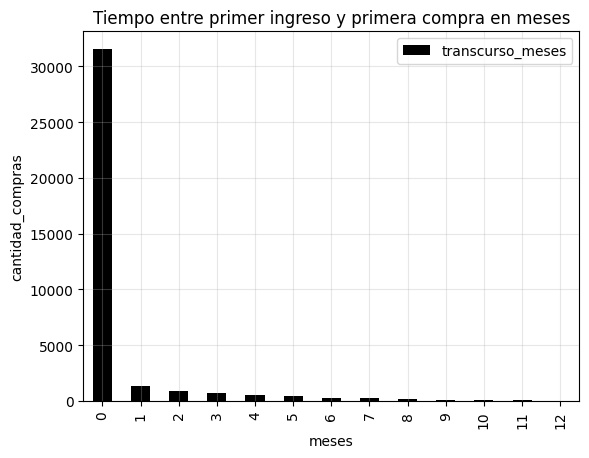

<Figure size 640x480 with 0 Axes>

In [34]:
transc_mes = transcurso_primera_orden.groupby('transcurso_meses').agg({'transcurso_meses':'count'})

transc_mes.plot(kind='bar',title='Tiempo entre primer ingreso y primera compra en meses' , xlabel='meses' , ylabel='cantidad_compras',
               color='black')
plt.grid(True , alpha=0.3)

plt.show()
plt.savefig("images/graph_3.png")

Como ya lo establecimos anteriormente es el primer mes en el cual la  gran mayoria de los clientes se decide a hacer la compra despues de haber ingresado por primera vez a la página esto tiene mucho sentido ya que la mayoria de eventos como conciertos se anuncian unos meses antes y se venden la totalidad de los boletos en los primeros dias. En resúmen y para responder la interrogante la gran mayoria de los clientes compra el mismo dia o un día despues que ingresa a la plataforma.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [35]:
ventas.head()

,buy_ts,revenue,uid,device,end_ts,source_id,start_ts,day,week,month,seconds
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,1,22,6,120
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,1,22,6,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,1,22,6,540
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,1,22,6,1140
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,1,22,6,1680


In [36]:
ventas['buy_month'] = (ventas['buy_ts']).dt.month
ventas['buy_year'] = (ventas['buy_ts']).dt.year
ventas_mes = ventas.groupby('buy_month').agg({'uid':'count' , 'revenue':'sum'})
ventas_mes.columns=['cant_ordenes','revenue']
ventas_mes

,cant_ordenes,revenue
buy_month,,
1,69714,504331.57
2,91302,667585.76
3,80026,815240.79
4,53249,586046.86
5,63244,406276.05
6,25840,148124.71
7,34369,253987.24
8,35846,211562.04
9,65156,738489.76


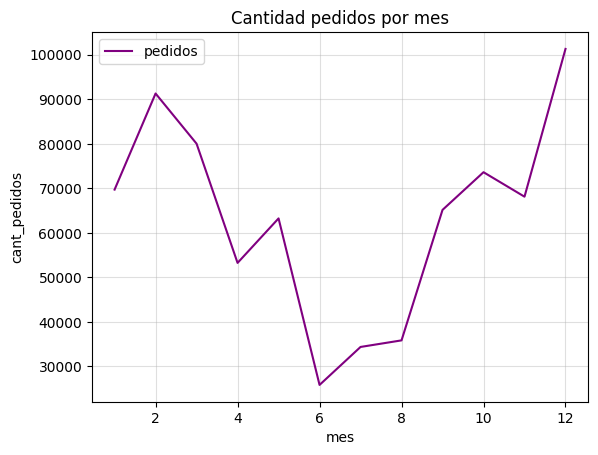

<Figure size 640x480 with 0 Axes>

In [37]:
ventas_mes.plot(kind='line', y='cant_ordenes' , title='Cantidad pedidos por mes' , xlabel='mes' , ylabel='cant_pedidos'
               , label='pedidos' , color='purple')
plt.grid(True , alpha=0.4)
plt.legend()
plt.show()
plt.savefig("images/graph_4.png")

En esta grafica podemos ver la relacion mensual entre los pedidos y los meses , dado que se tiene un periodo de entre 1 de junio del 2017 a 1 de junio del 2018 , se evidencian las estacionalidades como junio es un mes quieto mientras que diciembre es el mes mas algido puede darse a las vacaciones , la cantidad de eventos o la navidad por ejemplo.

#### ¿Cuál es el tamaño promedio de compra?

In [38]:
ventas_mes['ingreso_orden'] = (ventas_mes['revenue'] / ventas_mes['cant_ordenes']).round(2)
ventas_mes.columns=['cantidad_compras','ingresos','ingreso_prom']
ventas_mes

,cantidad_compras,ingresos,ingreso_prom
buy_month,,,
1,69714,504331.57,7.23
2,91302,667585.76,7.31
3,80026,815240.79,10.19
4,53249,586046.86,11.01
5,63244,406276.05,6.42
6,25840,148124.71,5.73
7,34369,253987.24,7.39
8,35846,211562.04,5.90
9,65156,738489.76,11.33


In [39]:
print(f"En promedio por orden se ingresa un total de: ${ventas_mes['ingreso_prom'].mean().round(2)} dolares")

En promedio por orden se ingresa un total de: $8.62 dolares


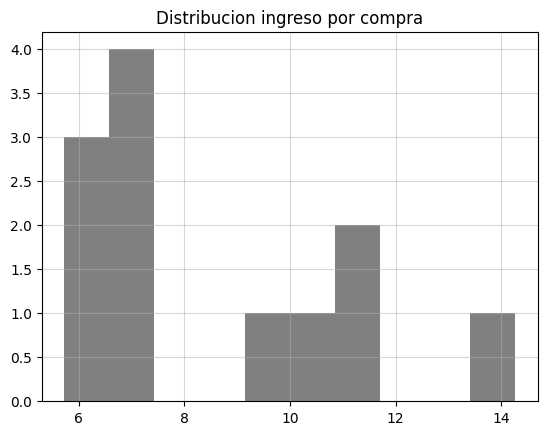

<Figure size 640x480 with 0 Axes>

In [40]:
plt.hist(ventas_mes['ingreso_prom'],color="grey")
plt.title("Distribucion ingreso por compra")
plt.grid(True,alpha=0.5)
plt.show()

plt.savefig("images/graph_5.png")

#### ¿Cuánto dinero traen? (LTV)

In [41]:
ventas['buy_ts'].describe()

count                           761807
mean     2017-12-22 10:01:15.159194368
min                2017-06-01 00:10:00
25%                2017-10-12 14:54:00
50%                2017-12-25 11:16:00
75%                2018-03-02 14:55:00
max                2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [42]:
ventas['order_month']= ventas['buy_ts'].dt.to_period('M').astype(str)

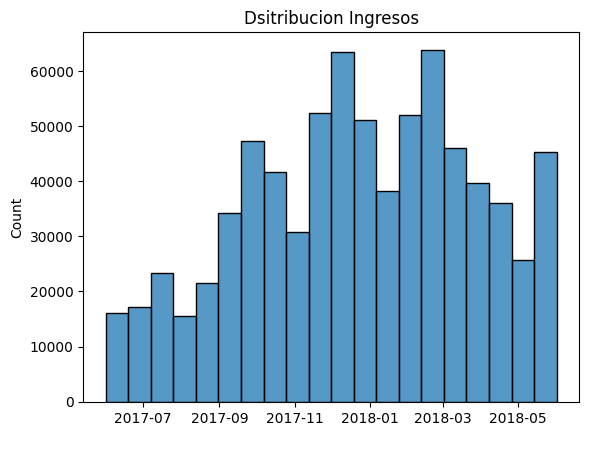

<Figure size 640x480 with 0 Axes>

In [43]:
sns.histplot(ventas['buy_ts'],bins=20)
plt.title("Dsitribucion Ingresos")
plt.xlabel(" ")
plt.show()
plt.savefig("images/graph_6.png")

In [44]:
costos['dt'].describe()

count                             2542
mean     2017-11-29 09:04:57.403619072
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: dt, dtype: object

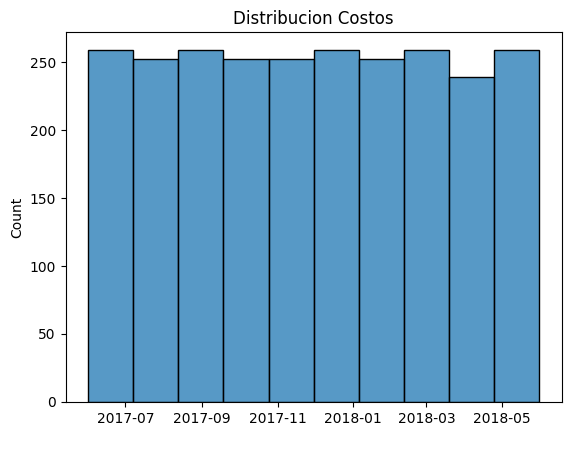

<Figure size 640x480 with 0 Axes>

In [45]:
sns.histplot(costos['dt'],bins=10)
plt.title("Distribucion Costos")
plt.xlabel(" ")
plt.show()
plt.savefig("images/graph_7.png")

In [46]:
ventas['order_month'] = ventas['buy_ts'].dt.to_period('M').astype(str) #creamos una nueva columna para usar el metodo requerido
costos['first_order_month'] = costos['dt'].dt.to_period('M').astype(str)


first_buy = ventas.groupby('uid').agg({'order_month':'min'}).reset_index()
first_buy.columns=['uid','first_order_month']

first_buy.head()

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [47]:
cohort_size = first_buy.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns=['first_order_month','n_buyers']
cohort_size.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [48]:
orders_=pd.merge(ventas,first_buy,on='uid')
orders_s=orders_[['uid','buy_ts','revenue','order_month','first_order_month']]

orders_s.sample(10)

,uid,buy_ts,revenue,order_month,first_order_month
749180,15351921541627454152,2018-05-27 09:46:00,1.47,2018-05,2018-04
129058,11920452646463905188,2017-09-18 18:10:00,11.00,2017-09,2017-06
325407,14965030714373758003,2017-12-06 22:20:00,16.38,2017-12,2017-11
721717,3263486045884611639,2018-05-16 12:37:00,7.33,2018-05,2017-06
755226,11920452646463905188,2018-05-30 09:38:00,0.30,2018-05,2017-06
78690,9474505536711289640,2017-08-18 22:03:00,5.50,2017-08,2017-08
410157,3263486045884611639,2018-01-04 15:44:00,9.17,2018-01,2017-06
643626,11920452646463905188,2018-03-29 11:29:00,3.05,2018-03,2017-06
539160,12758178711120085824,2018-02-21 21:34:00,3.67,2018-02,2017-11
245954,3263486045884611639,2017-11-09 10:10:00,2.20,2017-11,2017-06


In [49]:
cohorts=orders_s.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head(5)

,first_order_month,order_month,revenue
0,2017-06,2017-06,148121.29
1,2017-06,2017-07,155869.55
2,2017-06,2017-08,114898.83
3,2017-06,2017-09,374481.76
4,2017-06,2017-10,351833.14


In [50]:
report = pd.merge(cohort_size,cohorts,on='first_order_month')

report.head(5)

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2023,2017-06,148121.29
1,2017-06,2023,2017-07,155869.55
2,2017-06,2023,2017-08,114898.83
3,2017-06,2023,2017-09,374481.76
4,2017-06,2023,2017-10,351833.14


In [51]:
margin_rate = 0.5
report['gp'] = report['revenue']* margin_rate
report['order_month'] = pd.to_datetime(report['order_month'])
report['first_order_month'] = pd.to_datetime(report['first_order_month'])
report['month'] = (
    report['order_month'].dt.to_period('M') - report['first_order_month'].dt.to_period('M')
).apply(lambda x: x.n)

report.head(5)


,first_order_month,n_buyers,order_month,revenue,gp,month
0,2017-06-01,2023,2017-06-01,148121.29,74060.645,0
1,2017-06-01,2023,2017-07-01,155869.55,77934.775,1
2,2017-06-01,2023,2017-08-01,114898.83,57449.415,2
3,2017-06-01,2023,2017-09-01,374481.76,187240.880,3
4,2017-06-01,2023,2017-10-01,351833.14,175916.570,4


In [52]:
report['ltv'] = report['gp']/report['n_buyers']
output = report.pivot_table(index='first_order_month',columns='month',values='ltv',aggfunc='mean').round()
output.fillna('-')

month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,37.0,39.0,28.0,93.0,87.0,55.0,89.0,51.0,62.0,53.0,55.0,24.0
2017-07-01,26.0,13.0,39.0,14.0,5.0,6.0,3.0,4.0,7.0,10.0,7.0,-
2017-08-01,17.0,15.0,13.0,16.0,25.0,12.0,8.0,18.0,8.0,6.0,-,-
2017-09-01,33.0,30.0,11.0,159.0,19.0,24.0,32.0,11.0,6.0,-,-,-
2017-10-01,10.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,-,-,-,-
2017-11-01,14.0,10.0,5.0,10.0,4.0,1.0,3.0,-,-,-,-,-
2017-12-01,9.0,4.0,8.0,7.0,3.0,2.0,-,-,-,-,-,-
2018-01-01,9.0,6.0,8.0,2.0,1.0,-,-,-,-,-,-,-
2018-02-01,6.0,3.0,1.0,1.0,-,-,-,-,-,-,-,-


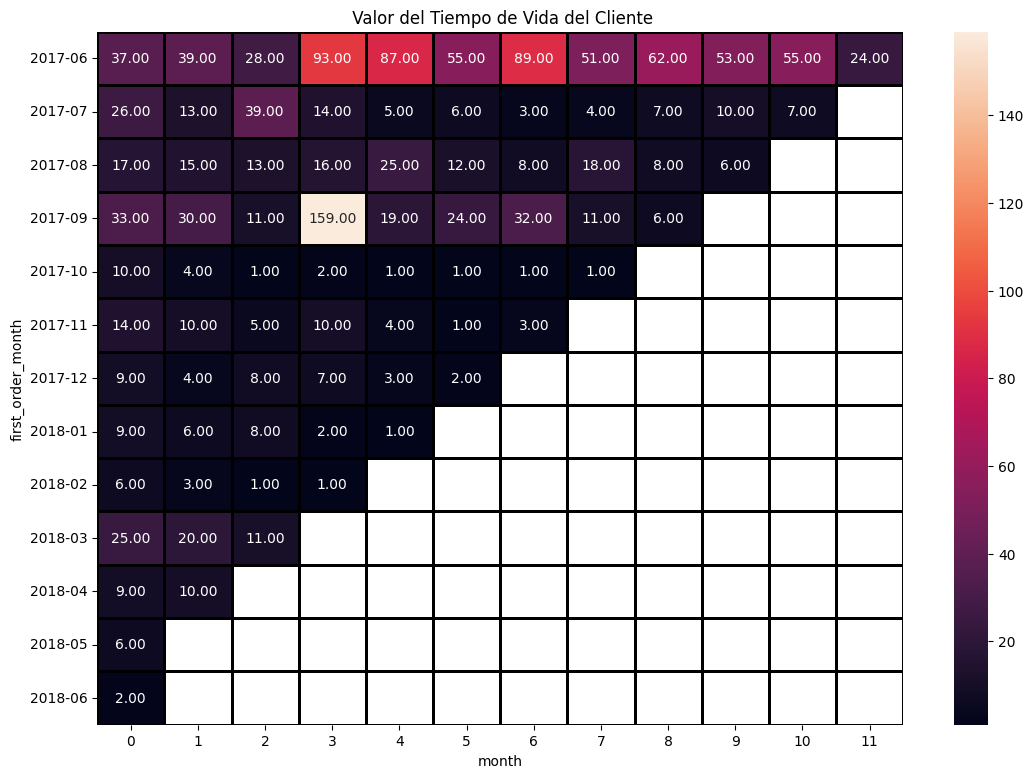

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize=(13,9))
plt.title(' Valor del Tiempo de Vida del Cliente')
output.index = output.index.strftime('%Y-%m')
sns.heatmap(
    output,
    annot = True,
    fmt ='.2f',
    linewidths=1,
    linecolor='black'
)
plt.show()
plt.savefig("images/graph_8.png")

Vemos la relaciones importante nuestros primeros clientes son los que mas compran es evidente como nos afecta la estacionalidad probablemente esos primeros clientes pagaron por un concierto bastante costoso.

In [54]:
print(f"En promedio un cliente nos genera unos ingresos de : ${report['ltv'].mean().round(2)}")

En promedio un cliente nos genera unos ingresos de : $18.92


### Marketing

#### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [55]:
costos['dt_month'] = costos['dt'].dt.to_period('M').astype(str)

In [56]:
costo_mes = costos.groupby(['dt_month','first_order_month']).agg({'costs':'sum'}).reset_index()
costo_mes.sample(5)

,dt_month,first_order_month,costs
11,2018-05,2018-05,22224.27
4,2017-10,2017-10,36322.88
10,2018-04,2018-04,22289.38
6,2017-12,2017-12,38315.35
5,2017-11,2017-11,37907.88


In [57]:
costo_source = costos.groupby('source_id').agg({'costs':'sum'}).reset_index()
costo_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [58]:
costos_mes_source=costos.pivot_table(index='first_order_month',columns='source_id',values='costs',aggfunc='sum')

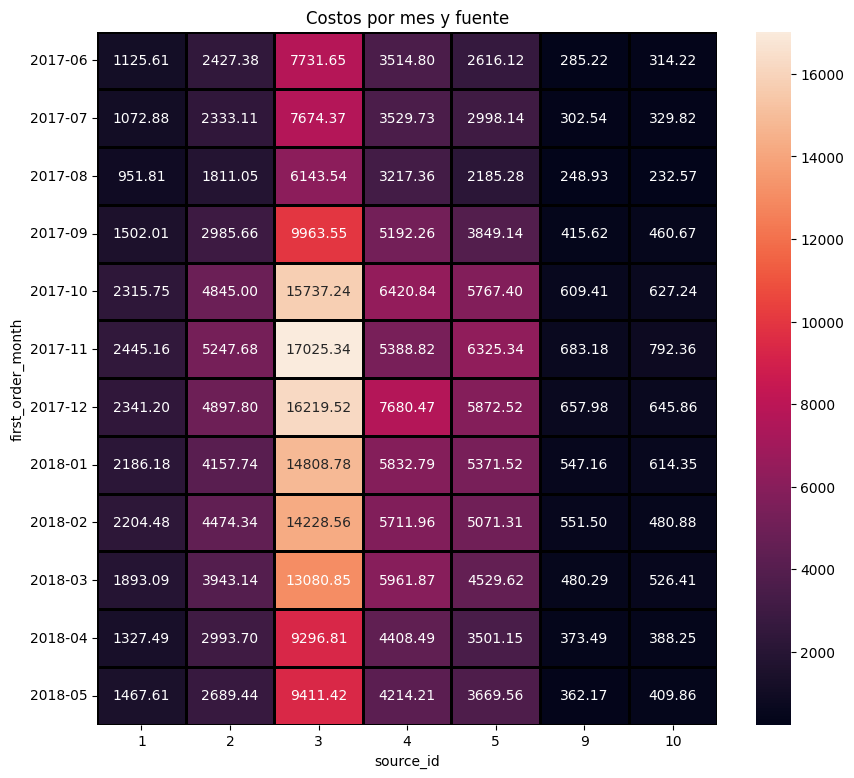

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(10,9))
plt.title('Costos por mes y fuente')
plt.xlabel("Fuente")
plt.ylabel("Mes primera orden")
sns.heatmap(
    costos_mes_source,
    annot = True,
    fmt ='.2f',
    linewidths=1,
    linecolor='black'
)
plt.yticks(rotation=0)
plt.show()
plt.savefig("images/graph_11.png")

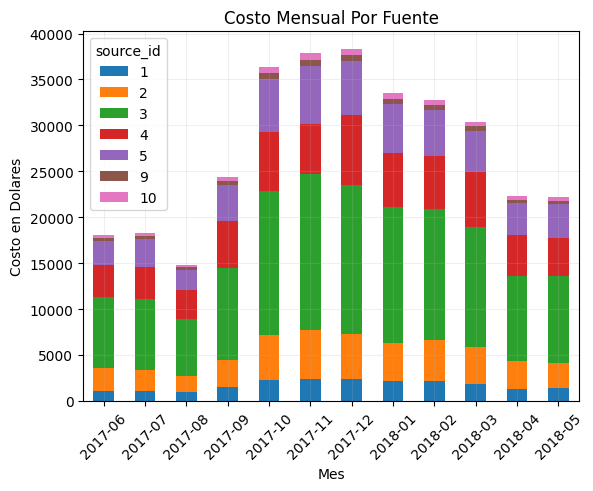

<Figure size 640x480 with 0 Axes>

In [60]:
costos_mes_source.index = pd.to_datetime(costos_mes_source.index).strftime('%Y-%m')

costos_mes_source.plot(kind='bar',stacked=True, title='Costo Mensual Por Fuente')
plt.xlabel('Mes')
plt.ylabel('Costo en Dolares')
plt.xticks(rotation=45)
plt.grid(True , alpha=0.2)
plt.show()
plt.savefig("images/graph_12.png")

In [61]:
print(f"A lo largo del año calendario desde 1 de junio de 2017 hasta el 31 de mayo del 2018 se invirtio en marketing un total de:  \n${costo_source['costs'].sum().round(2)} ")

print(f"lo que quiere decir que por mes se gasto un promedio de: ${(costos['costs'].sum().round(2))/12}")

print(f"El costo de cada fuente en proporción al gasto del mes es muy similar")

A lo largo del año calendario desde 1 de junio de 2017 hasta el 31 de mayo del 2018 se invirtio en marketing un total de:  
$329131.62 
lo que quiere decir que por mes se gasto un promedio de: $27427.635
El costo de cada fuente en proporción al gasto del mes es muy similar


####  ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [62]:
try:
    costos['first_order_month'] = pd.to_datetime(costos['first_order_month'])
except Exception as e:
    print(f"No se pudo convertir 'first_order_month' en el DataFrame 'costos': {e}")

try:
    report['first_order_month'] = pd.to_datetime(report['first_order_month'])
except Exception as e:
    print(f"No se pudo convertir 'first_order_month' en el DataFrame 'report': {e}")



In [63]:
report_ = pd.merge(costos, report, on='first_order_month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()
report_s = report_.groupby('source_id').agg({'cac':'mean'}).reset_index()
report_s

,source_id,cac
0,1,0.019227
1,2,0.039627
2,3,0.130633
3,4,0.058825
4,5,0.047696
5,9,0.005127
6,10,0.005406


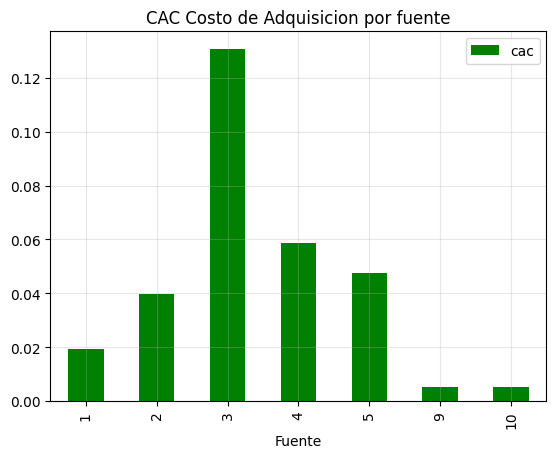

<Figure size 640x480 with 0 Axes>

In [64]:
report_s.plot(kind='bar',x='source_id' , y='cac',title='CAC Costo de Adquisicion por fuente',color='Green')
plt.xlabel('Fuente')
plt.grid(True,alpha=0.3)
plt.show()
plt.savefig("images/graph_13.png")

Se identifica que todas las fuentes atraen practicamente la misma cantidad de cliente por lo cual vamos a analizar cual es mas provechosa monetariamente nos encontramos con que la opcion 9 es la mejor ya que tiene  el CAC mas bajo 0.005127 , se recomienda dejar de trabajar con el source 3 dado que por cada cliente adquirido es la fuente mas costosa ademas de ser las que mayor costos genera.

####  ¿Cuán rentables eran las inversiones? (ROMI)


In [65]:
report_['romi'] =  report_['ltv'] / report_['cac']
report_.head(2)

,source_id,dt,costs,first_order_month,dt_month,n_buyers,order_month,revenue,gp,month,ltv,cac,romi
0,1,2017-06-01,75.2,2017-06-01,2017-06,2023,2017-06-01,148121.29,74060.645,0,36.609315,0.037173,984.849003
1,1,2017-06-01,75.2,2017-06-01,2017-06,2023,2017-07-01,155869.55,77934.775,1,38.524357,0.037173,1036.366689


In [66]:
output_source = report_.groupby('source_id').agg({'romi':'mean'}).reset_index()
output_source

,source_id,romi
0,1,1194.678326
1,2,546.025470
2,3,193.998492
3,4,1083.296328
4,5,579.407245
5,9,4287.783716
6,10,5116.783655


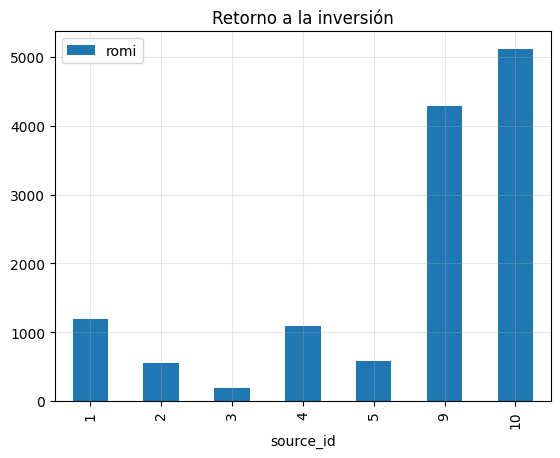

<Figure size 640x480 with 0 Axes>

In [67]:
output_source.plot(kind='bar',title='Retorno a la inversión',x='source_id', y='romi')
plt.grid(True,alpha=0.3)
plt.show()
plt.savefig("images/graph_14.png")

Resaltando lo analizado la fuente que nos generamas retorno es la 10 seguida de la 9 en ultimo lugar encontramos a la 3 lo cual genera preocupacion dado que es la que mas costos genera.

## Conclusiones

Este informe presenta informacion clave , bastante explicita sobre la importancia de calcular las metricas en cuanto a lo general el resultado es positivo dado que el LTV es mucho mayor que el cac , lo cual refleja el impacto positivo dado que estamos ganando dinero por encima del margen establecido del 50% , de igual manera aún podemos aumentar nuestro beneficio dado que las fuentes de marketing que mas usamos son las que nos generan menor retorno , en este caso los costos de adquisicion de la fuentes 3 son considerablemente altos con respecto a sus pares sin embargo son los que generan menor retorno a la inversión por otro lado se encuentra la fuente 10 la cual es que la genera los menores costos y genera el mayor retorno .
 
De igual manera no contamos con toda la informacion dado que hay la psoibilidad de que la fuente 3 tenga un beneficio extra que no puedo ver unicamente con los datos como ingresar a un nuevo mercado que es posible unicamente por esa vía .

Se requiere volumen de clientes en nuestra página esta es la clave teniendo en cuenta que una persona dura en nuestra pagina alreddor de 10 minutos unicamente , e ingresan en promedio una vez a la semana lo que permite ver que una vez un cliente ingresa lo mas probable es que no se piense mucho si va a realizar o no la compra el rate compradores el primer dia  : 72.18% , lo que refleja que nuestra prioridad debe ser que el usuario ingrese a la pagina una vez allí lo mas probable es que haga una compra.

En cuanto al comportamiento de manera mensual se evidencia como las ventas disminuyeron el mes 6 del estudio que refiere a noviembre del 2017 , lo cual es paradogico dado que fue el segundo mes con mayor gasto en cuanto a fuentes de anuncios , abria que investigar que pudo suceder al ser una empresa que intermedia un servicio de entretenimiento como lo son los conciertos puede darse debido a que ningun cantante reconocido tuvo presentaciones en nuestra jurisdiccion durante dicho periodo de tiempo pero hay que investigar mas al respecto , en promedio por venta nos ingresan 8.62 , por lo cual como ya fue establecido lo importante es el volumen de clientes tener mucho alcance es clave , el tamaño promedio de compra de cliente es variable y puede tener que ver con lo que ya se analizo si viene un artista de talla mundial es muy posible que las personas paguen boletos mucho mas costosos de igual manera se establece que un cliente en promedio nos deja 18.92 dolares lo cual refleja que realizan al menos dos compras teniendo en cuenta el promedio de venta.